## Crop Status
There are only a few techies who are working on projects related to Agriculture. It is very important for us to contribute equally to different sectors when it is required all over the world. Though the old techniques of agriculture cannot be ignored, we need to think of adding innovative technology on top of them.

### Goal: 
Given the dataset related to agriculture, you should be able to build a model that will classify the status of the existing crop by considering a set of parameters.

### Data Description: 
Data is recorded by considering parameters related to crop when it is treated with toxicants(pesticides).

### Attribute Information:

1.  ID - Unique number represents each record
2.  Insects - Average number of insects that (may) affect the crop.
3.  Crop - Type of crop [Food crop and Feed crop]
4.  Soil - Type of soil [Clay and silt]
5.  Category_of_Toxicant - Values 1, 2, 3 represent three different toxicants available in the market.
6.  Does_count - Represents the dosage count of toxicants.
7.  Number_of_Weeks_Used - Represents the number of weeks for which the crop remained toxicant.
8.  Number_Weeks_does_not used - Represents the number of weeks that the toxicants are used on the crop.
9.  Season - Represents the various seasons (Monsoon, etc.,)
10. Crop_status - 0 represents ‘Crop can be used further’, 1 represents ‘crop is damaged due to nature’, 2 represents ‘toxicants
are responsible for crop’s damage’.

### Provided Files:

#### training_data: 
This file consists of all the features. It should be used for both training and model validation purposes. [80,000 records]
#### test_data: 
Test file consists of all attributes except the target variable and prediction is to be made for all the rows in the test file. [35,000 records]

### Objective Of The Problem: 
The objective of the problem is to predict the status of the crop which will be helpful for agriculture experts.

### Evaluation Criteria: 
The metric of evaluation for the problem is Accuracy score.

In [272]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [273]:
data= pd.read_excel(r"D:\skillenza denis\Stage2\train.xlsx")

In [274]:
data.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season,Crop_status
0,1,188,Feed,clay,1,0,0.0,0,1,0
1,2,209,Feed,clay,1,0,0.0,0,2,1
2,3,257,Feed,clay,1,0,0.0,0,2,1
3,4,257,Feed,silt,1,0,0.0,0,2,1
4,5,342,Feed,clay,1,0,0.0,0,2,1


In [275]:
data.shape

(80000, 10)

In [276]:
data["Crop"].value_counts()

Food    57333
Feed    22667
Name: Crop, dtype: int64

In [277]:
data["Soil"].value_counts()

clay    43556
silt    36444
Name: Soil, dtype: int64

In [278]:
data["Crop_status"].value_counts()

0    66716
1    11183
2     2101
Name: Crop_status, dtype: int64

# Checking Null values

In [279]:
data.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          8055
Number_Weeks_does_not used       0
Season                           0
Crop_status                      0
dtype: int64

In [280]:
data_tr = data.drop(["ID" , "Season"] , axis = 1)

In [281]:
data_tr.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Crop_status
0,188,Feed,clay,1,0,0.0,0,0
1,209,Feed,clay,1,0,0.0,0,1
2,257,Feed,clay,1,0,0.0,0,1
3,257,Feed,silt,1,0,0.0,0,1
4,342,Feed,clay,1,0,0.0,0,1


In [282]:
data_tr.Number_of_Weeks_Used.value_counts()

20.0    3489
30.0    3400
25.0    2792
40.0    2444
15.0    2243
        ... 
63.0      46
64.0      40
65.0      31
66.0      17
67.0       7
Name: Number_of_Weeks_Used, Length: 64, dtype: int64

In [283]:
data_tr.Number_of_Weeks_Used = data_tr.Number_of_Weeks_Used.fillna(data_tr.Number_of_Weeks_Used.mean())

In [284]:
data_tr.isnull().sum()

Insects                       0
Crop                          0
Soil                          0
Category_of_Toxicant          0
Does_count                    0
Number_of_Weeks_Used          0
Number_Weeks_does_not used    0
Crop_status                   0
dtype: int64

In [285]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [286]:
data_tr[data_tr.select_dtypes(include=["object"]).columns] = data_tr[data_tr.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [287]:
data_tr.head()
len(data_tr)
data_tr

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Crop_status
0,188,0,0,1,0,0.0,0,0
1,209,0,0,1,0,0.0,0,1
2,257,0,0,1,0,0.0,0,1
3,257,0,1,1,0,0.0,0,1
4,342,0,0,1,0,0.0,0,1
...,...,...,...,...,...,...,...,...
79995,209,1,1,2,20,12.0,6,0
79996,232,1,1,2,20,12.0,9,0
79997,256,1,1,2,10,14.0,10,0
79998,256,1,1,2,10,16.0,8,0


<AxesSubplot:>

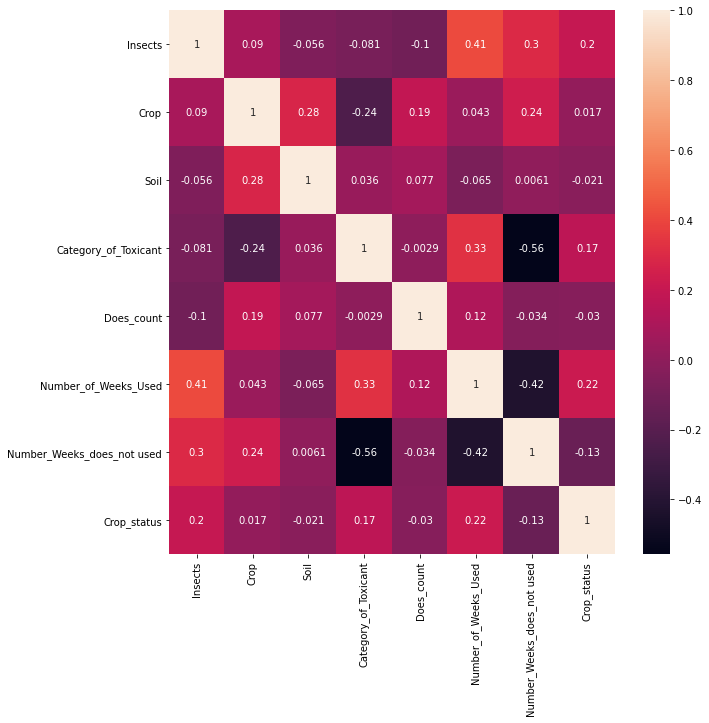

In [288]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(data_tr.corr(),annot= True )

# Sampling

In [289]:
X = data_tr.drop("Crop_status", axis = 1)
Y = data_tr[["Crop_status"]]

#sampling
from sklearn.model_selection import train_test_split

train_x , test_x , train_y , test_y = train_test_split( X , Y , test_size = .2 , random_state = 57)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(64000, 7)
(16000, 7)
(64000, 1)
(16000, 1)


# Model BUilding On Logistic Regression

In [290]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [291]:
model = logreg.fit(train_x, train_y)
#print("Model Fitted Successfully!!!")

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [292]:
pred_log = model.predict(test_x)
pred_value = model.predict(test_x)

In [293]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_log, test_y)
print("Confusion Matrix:\n",tab1)

Confusion Matrix:
 [[13246  2087   358]
 [  144   134    31]
 [    0     0     0]]


In [294]:
tab1.diagonal().sum()/tab1.sum()

0.83625

# Model building on RandomForestClassifier

In [295]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [296]:
model1=rf.fit(train_x , train_y)
pred_rf = rf.predict(test_x)
tab2 = confusion_matrix(pred_rf, test_y)
print("Confusion Matrix:\n",tab2)

<ipython-input-296-15ff01ea966c>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1=rf.fit(train_x , train_y)


Confusion Matrix:
 [[12526  1686   241]
 [  760   461   127]
 [  104    74    21]]


In [297]:
tab2.diagonal().sum()/tab2.sum()

0.813

# Model Building on Decision tree

In [298]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dtree.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [299]:
model2=dtree.fit(train_x , train_y)
pred_value = dtree.predict(test_x)

In [300]:
tab3 =confusion_matrix(pred_value , test_y)
tab3

array([[13371,  2122,   361],
       [   19,    99,    28],
       [    0,     0,     0]], dtype=int64)

In [301]:
tab3.diagonal().sum()/tab3.sum()

0.841875

# Model Building on Gradient Boosting

In [302]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [303]:
model3=gbc.fit(train_x,train_y)
print("Model Fitted")

C:\Users\Denis\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model Fitted


In [304]:
pred_gbc = gbc.predict(test_x)

In [305]:
tab4 = confusion_matrix(pred_gbc, test_y)
print("Confusion Matrix:\n",tab4)

Confusion Matrix:
 [[13227  1904   296]
 [  163   315    93]
 [    0     2     0]]


In [306]:
tab4.diagonal().sum()/tab4.sum()

0.846375

# Model Building on LGBM Classifier

In [307]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold, train_test_split

In [308]:
params = {}
params['learning_rate'] = 0.04
params['max_depth'] = 18
params['n_estimators'] = 3000
params['objective'] = 'multiclass'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['random_state'] = 42
params['colsample_bytree']=0.7
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 1.7
params['reg_lambda'] = 1.11
params['class_weight']: {0: 0.44, 1: 0.4, 2: 0.37}

In [309]:
lg=LGBMClassifier(max_depth = 10 , n_estimators=130 ,learning_rate=0.1,boosting_type='gbdt',subsample=0.9,random_state=40,)

model4 = lg.fit(train_x , train_y)
Y_predict=lg.predict(test_x)

print(f1_score(test_y,Y_predict, average='weighted'))

print(accuracy_score(test_y,Y_predict))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


C:\Users\Denis\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8098107413732702
0.849625


In [310]:
model4 = lg.fit(train_x , train_y)
Y_predict=lg.predict(test_x)

print(f1_score(test_y,Y_predict, average='micro'))

print(accuracy_score(test_y,Y_predict))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
0.849625
0.849625


In [311]:
from sklearn.metrics import confusion_matrix

tab5 =confusion_matrix(Y_predict , test_y)
tab5

array([[13166,  1792,   269],
       [  224,   427,   119],
       [    0,     2,     1]], dtype=int64)

In [312]:
tab5.diagonal().sum()*100/tab5.sum()

84.9625

# Test Data

In [313]:
data_te =pd.read_excel(r"D:\skillenza denis\Stage2\test.xlsx")

In [314]:
data_te.head()

,ID,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used,Season
0,1,188,Feed,silt,1,0,NaN,0,2
1,2,410,Feed,silt,1,0,0.0,0,2
2,3,626,Feed,clay,1,0,0.0,0,2
3,4,731,Feed,clay,1,0,0.0,0,2
4,5,789,Food,clay,1,0,0.0,0,1


In [315]:
data_te.shape

(35000, 9)

In [316]:
data_te.isnull().sum()

ID                               0
Insects                          0
Crop                             0
Soil                             0
Category_of_Toxicant             0
Does_count                       0
Number_of_Weeks_Used          3542
Number_Weeks_does_not used       0
Season                           0
dtype: int64

In [317]:
data_te = data_te_.drop(["ID" , "Season"] , axis = 1)

In [318]:
data_te.Number_of_Weeks_Used = data_te.Number_of_Weeks_Used.fillna(data_te.Number_of_Weeks_Used.mean())

In [319]:
data_te[data_te.select_dtypes(include=["object"]).columns] = data_te[data_te.select_dtypes(include=["object"]).columns].apply(le.fit_transform)

In [320]:
data_te.head()

,Insects,Crop,Soil,Category_of_Toxicant,Does_count,Number_of_Weeks_Used,Number_Weeks_does_not used
0,188,0,1,1,0,28.775701,0
1,410,0,1,1,0,0.000000,0
2,626,0,0,1,0,0.000000,0
3,731,0,0,1,0,0.000000,0
4,789,1,0,1,0,0.000000,0


In [321]:
data_te.shape

(35000, 7)

In [322]:
pred_value_te = model4.predict(data_te)
pred_value_te

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [323]:
l3p1_submission1 = pd.DataFrame({"ID":data_te_["ID"],
                               "Crop_status":pred_value_te})

In [324]:
l3p1_submission1.to_csv(r"D:\skillenza denis\Stage2\sub5.csv",index=False)